We need a directed weighted toy network.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def func3(G, name, deg_ext=None, bins=9, weight=None):

    # print(f"{name}:")
    nodes, edges = G.number_of_nodes(), G.number_of_edges()

    in_degrees = [deg for (id, deg) in G.in_degree(weight=weight) if deg > 0]
    out_degrees = [deg for (id, deg) in G.out_degree(weight=weight) if deg > 0]

    if deg_ext:
        in_kmin, in_kmax, out_kmin, out_kmax = deg_ext
    else:
        in_kmin = min(in_degrees)
        in_kmax = max(in_degrees)
        out_kmin = min(out_degrees)
        out_kmax = max(out_degrees)

    # Get 10 logarithmically spaced bins between kmin and kmax
    # in_bin_edges_log = np.logspace(np.log10(in_kmin + 1e-1), np.log10(in_kmax), num=bins + 1)
    # out_bin_edges_log = np.logspace(np.log10(out_kmin + 1e-1), np.log10(out_kmax), num=bins + 1)
    in_bin_edges_log = np.logspace(np.log10(in_kmin), np.log10(in_kmax), num=bins + 1)
    out_bin_edges_log = np.logspace(np.log10(out_kmin), np.log10(out_kmax), num=bins + 1)

    # histogram the data into these bins
    in_density_log, _ = np.histogram(in_degrees, bins=in_bin_edges_log, density=True)    
    out_density_log, _ = np.histogram(out_degrees, bins=out_bin_edges_log, density=True)
    
    # "x" should be midpoint (IN LOG SPACE) of each bin
    in_log_be_log = np.log10(in_bin_edges_log)
    in_x_log = 10**((in_log_be_log[1:] + in_log_be_log[:-1])/2)
    
    out_log_be_log = np.log10(out_bin_edges_log)
    out_x_log = 10**((out_log_be_log[1:] + out_log_be_log[:-1])/2)

    # Get 20 logarithmically spaced bins between kmin and kmax
    in_bin_edges = np.linspace(in_kmin, in_kmax, num=bins + 1)
    out_bin_edges = np.linspace(out_kmin, out_kmax, num=bins + 1)
    
    # histogram the data into these bins
    in_density, _ = np.histogram(in_degrees, bins=in_bin_edges, density=True)
    out_density, _ = np.histogram(out_degrees, bins=out_bin_edges, density=True)

    # "x" should be midpoint (IN LOG SPACE) of each bin
    in_log_be = np.log10(in_bin_edges)
    in_x = 10**((in_log_be[1:] + in_log_be[:-1])/2)
    
    out_log_be = np.log10(out_bin_edges)
    out_x = 10**((out_log_be[1:] + out_log_be[:-1])/2)

    fig, axis = plt.subplots(2, 2, figsize=(12,9))

    fig.suptitle(f"{name}{f' - {weight}' if weight is not None else ''}: nodes = {nodes}, edges = {edges}")

    axis = axis.ravel()

    axis[0].loglog(in_x_log, in_density_log, marker='o', linestyle='none')
    axis[0].set_xlabel(r"in degree $k$ - loglog", fontsize=16)
    axis[0].set_ylabel(r"$P(k)$", fontsize=16)
    
    axis[1].loglog(out_x_log, out_density_log, marker='o', linestyle='none')
    axis[1].set_xlabel(r"out degree $k$ - loglog", fontsize=16)
    axis[1].set_ylabel(r"$P(k)$", fontsize=16)
    
    axis[2].plot(in_x, in_density, marker='o', linestyle='none')
    axis[2].set_xlabel(r"in degree $k$", fontsize=16)
    axis[2].set_ylabel(r"$P(k)$", fontsize=16)
    
    axis[3].plot(out_x, out_density, marker='o', linestyle='none')
    axis[3].set_xlabel(r"out degree $k$", fontsize=16)
    axis[3].set_ylabel(r"$P(k)$", fontsize=16)
    
    # save the plot
    plt.tight_layout()
    plt.show()
    # fig.savefig(f"figs3/{name.split('.')[0]}.png")
    # plt.close()


In [3]:
def compare_func3(G1, G2, name, deg_ext=None, bins=9, weight=None):

    # print(f"{name}:")
    nodes1, edges1 = G1.number_of_nodes(), G1.number_of_edges()
    nodes2, edges2 = G2.number_of_nodes(), G2.number_of_edges()

    in_degrees1 = [deg for (id, deg) in G1.in_degree(weight=weight) if deg > 0]
    out_degrees1 = [deg for (id, deg) in G1.out_degree(weight=weight) if deg > 0]
    
    in_degrees2 = [deg for (id, deg) in G2.in_degree(weight=weight) if deg > 0]
    out_degrees2 = [deg for (id, deg) in G2.out_degree(weight=weight) if deg > 0]

    if deg_ext:
        in_kmin, in_kmax, out_kmin, out_kmax = deg_ext
    else:
        in_kmin = min(min(in_degrees1), min(in_degrees2))
        in_kmax = max(max(in_degrees1), max(in_degrees2))
        out_kmin = min(min(out_degrees1), min(out_degrees2))
        out_kmax = max(max(out_degrees1), max(out_degrees2))

    # Get 10 logarithmically spaced bins between kmin and kmax
    in_bin_edges_log = np.logspace(np.log10(in_kmin), np.log10(in_kmax), num=bins + 1)
    out_bin_edges_log = np.logspace(np.log10(out_kmin), np.log10(out_kmax), num=bins + 1)

    # histogram the data into these bins
    in_density_log1, _ = np.histogram(in_degrees1, bins=in_bin_edges_log, density=True)    
    out_density_log1, _ = np.histogram(out_degrees1, bins=out_bin_edges_log, density=True)
    in_density_log2, _ = np.histogram(in_degrees2, bins=in_bin_edges_log, density=True)    
    out_density_log2, _ = np.histogram(out_degrees2, bins=out_bin_edges_log, density=True)
    
    # "x" should be midpoint (IN LOG SPACE) of each bin
    in_log_be_log = np.log10(in_bin_edges_log)
    in_x_log = 10**((in_log_be_log[1:] + in_log_be_log[:-1])/2)
    
    out_log_be_log = np.log10(out_bin_edges_log)
    out_x_log = 10**((out_log_be_log[1:] + out_log_be_log[:-1])/2)

    # Get 20 logarithmically spaced bins between kmin and kmax
    in_bin_edges = np.linspace(in_kmin, in_kmax, num=bins + 1)
    out_bin_edges = np.linspace(out_kmin, out_kmax, num=bins + 1)
    
    # histogram the data into these bins
    in_density1, _ = np.histogram(in_degrees1, bins=in_bin_edges, density=True)
    out_density1, _ = np.histogram(out_degrees1, bins=out_bin_edges, density=True)
    in_density2, _ = np.histogram(in_degrees2, bins=in_bin_edges, density=True)
    out_density2, _ = np.histogram(out_degrees2, bins=out_bin_edges, density=True)

    # "x" should be midpoint (IN LOG SPACE) of each bin
    in_log_be = np.log10(in_bin_edges)
    in_x = 10**((in_log_be[1:] + in_log_be[:-1])/2)
    
    out_log_be = np.log10(out_bin_edges)
    out_x = 10**((out_log_be[1:] + out_log_be[:-1])/2)

    fig, axis = plt.subplots(2, 2, figsize=(12,9))

    fig.suptitle(f"{name}{f' - {weight}' if weight is not None else ''}: nodes = {nodes1}/{nodes2}, edges = {edges1}/{edges2}")

    axis = axis.ravel()

    axis[0].loglog(in_x_log, in_density_log1, marker='o', linestyle='none', c='b', label='G1')
    axis[0].loglog(in_x_log, in_density_log2, marker='o', linestyle='none', c='y', label='G2')
    axis[0].set_xlabel(r"in degree $k$ - loglog", fontsize=16)
    axis[0].set_ylabel(r"$P(k)$", fontsize=16)
    
    axis[1].loglog(out_x_log, out_density_log1, marker='o', linestyle='none', c='b', label='G1')
    axis[1].loglog(out_x_log, out_density_log2, marker='o', linestyle='none', c='y', label='G2')
    axis[1].set_xlabel(r"out degree $k$ - loglog", fontsize=16)
    axis[1].set_ylabel(r"$P(k)$", fontsize=16)
    
    axis[2].plot(in_x, in_density1, marker='o', linestyle='none', c='b', label='G1')
    axis[2].plot(in_x, in_density2, marker='o', linestyle='none', c='y', label='G2')
    axis[2].set_xlabel(r"in degree $k$", fontsize=16)
    axis[2].set_ylabel(r"$P(k)$", fontsize=16)
    
    axis[3].plot(out_x, out_density1, marker='o', linestyle='none', c='b', label='G1')
    axis[3].plot(out_x, out_density2, marker='o', linestyle='none', c='y', label='G2')
    axis[3].set_xlabel(r"out degree $k$", fontsize=16)
    axis[3].set_ylabel(r"$P(k)$", fontsize=16)
    
    # save the plot
    plt.tight_layout()
    plt.legend()
    plt.show()
    # fig.savefig(f"figs3/{name.split('.')[0]}.png")
    # plt.close()


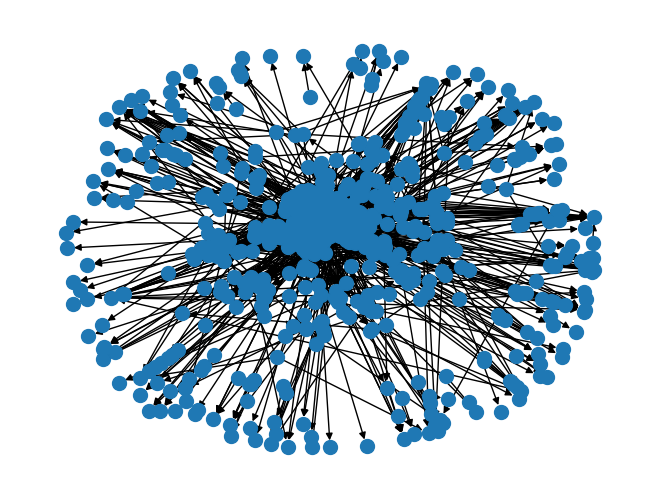

In [271]:
# https://networkx.org/documentation/stable/reference/generated/networkx.generators.directed.scale_free_graph.html#networkx.generators.directed.scale_free_graph
N = 1000
G = nx.scale_free_graph(N)
G = nx.DiGraph(G)
G.remove_edges_from(list(nx.selfloop_edges(G)))
nx.draw(G, node_size=100)

In [272]:
import random
#code creating G here
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(1,10)

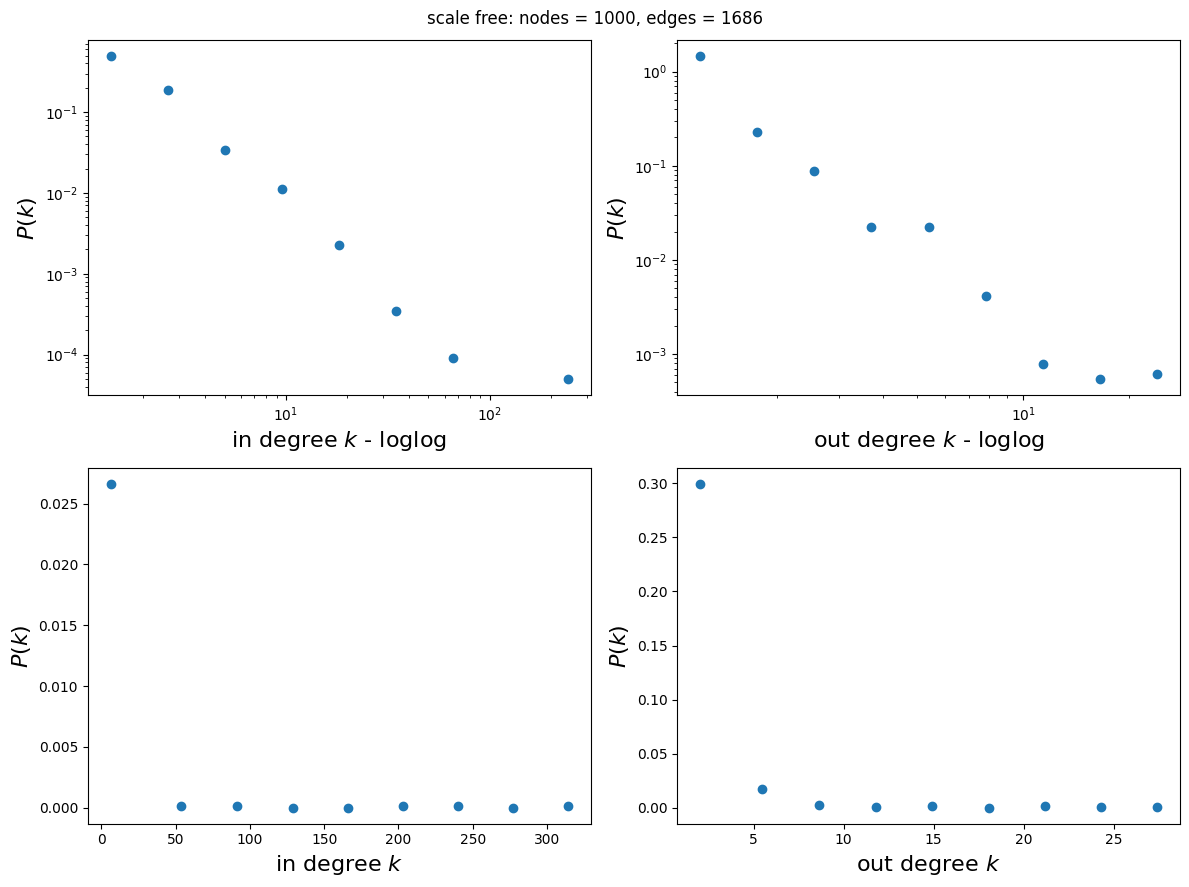

In [273]:
func3(G, 'scale free')

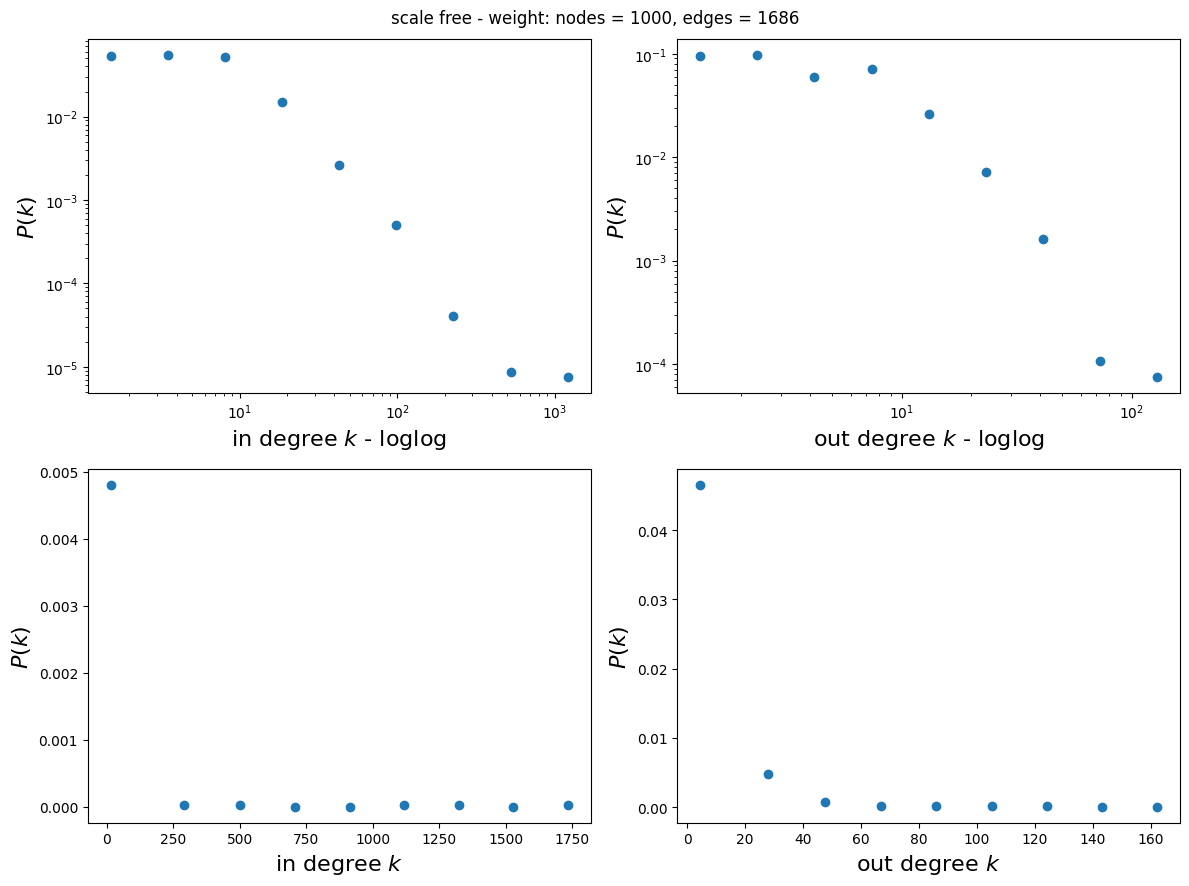

In [274]:
func3(G, 'scale free', weight='weight')

## Networkx
Time to [swap](https://networkx.org/documentation/stable/reference/algorithms/swap.html).

In [42]:
# G_swap = nx.double_edge_swap(G, G.number_of_edges(), 10 * G.number_of_edges())
# NetworkXError: double_edge_swap() not defined for directed graphs. Use directed_edge_swap instead.

In [54]:
G_swap = nx.directed_edge_swap(G.copy(), nswap=G.number_of_edges(), max_tries=10 * G.number_of_edges())

In [55]:
list(nx.selfloop_edges(G_swap))

[]

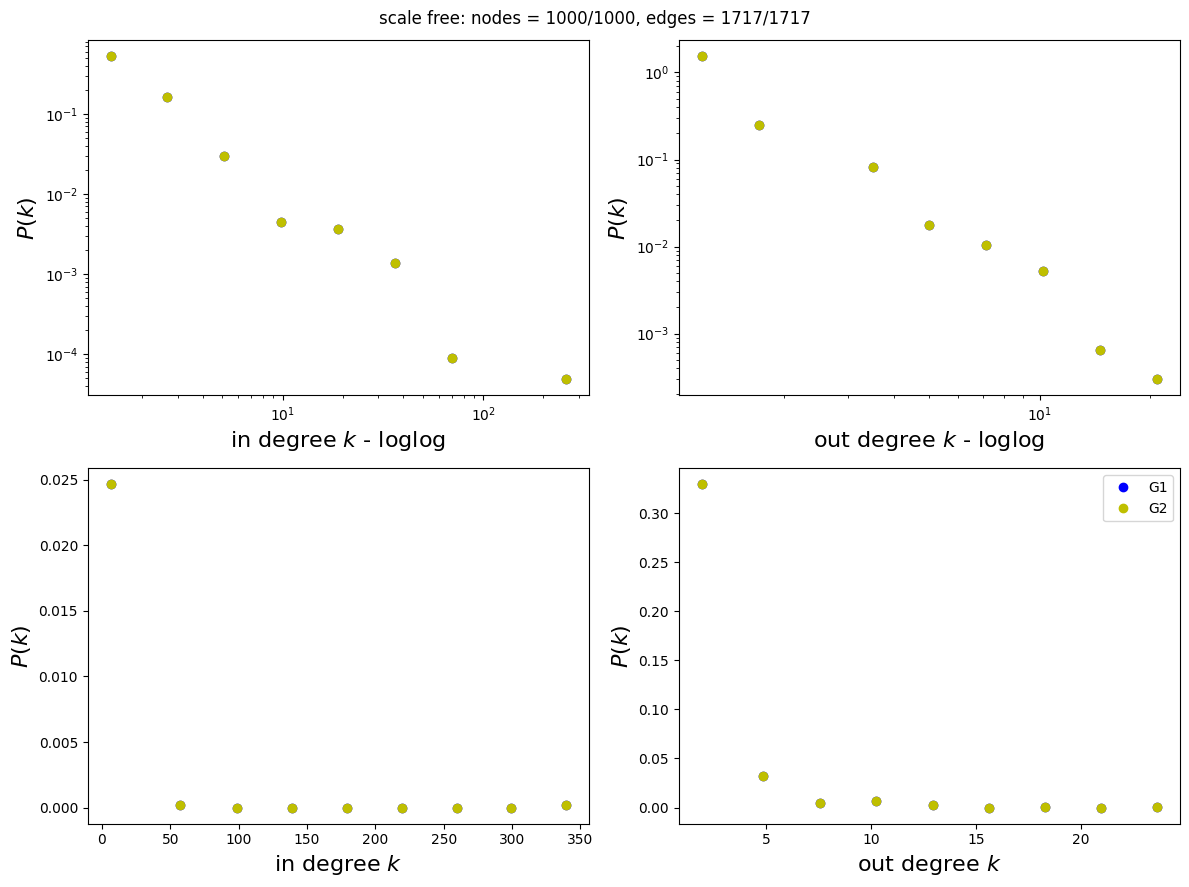

In [56]:
compare_func3(G, G_swap, 'scale free')

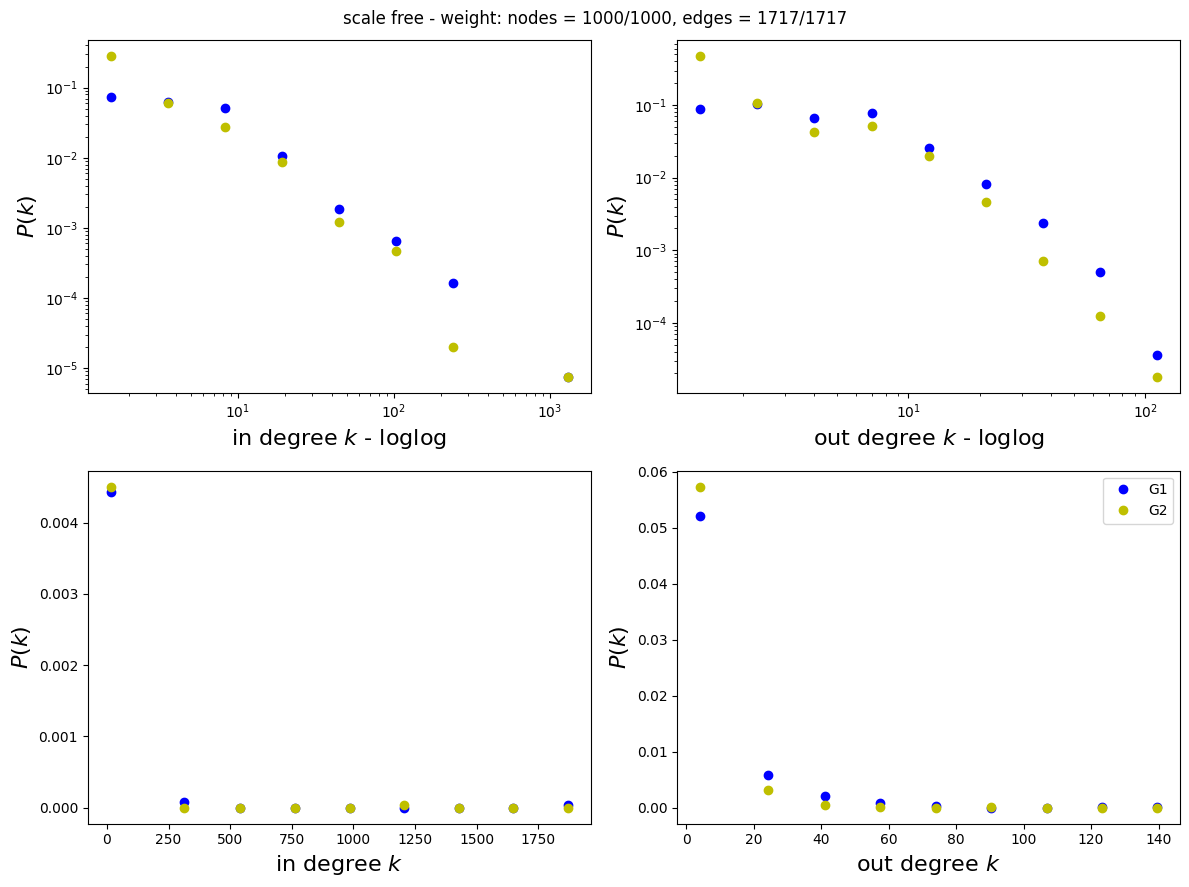

In [57]:
compare_func3(G, G_swap, 'scale free', weight='weight')

This doesn't keep weights.

```
Swap three edges in a directed graph while keeping the node degrees fixed.

A directed edge swap swaps three edges such that a -> b -> c -> d becomes a -> c -> b -> d. This pattern of swapping allows all possible states with the same in- and out-degree distribution in a directed graph to be reached.

If the swap would create parallel edges (e.g. if a -> c already existed in the previous example), another attempt is made to find a suitable trio of edges.
```

we have 3 edges here. we call their weights respectively Wab, Wbc, Wcd.
we'll have it this way:</br>
Wac = Aab </br>
Wcb = Wbc </br>
Wbd = Wcd</br>

this would work if we had indirected networks. now, in/out degree distribution cannot be kept intact this way.

## Brain Connectivity Toolbox

For further investigation, we need to see brain connectivity toolbox network randomization algorithms.

```
- randmio_dir.m; randmio_dir_connected.m; randmio_dir_signed (BD, WD networks): These functions preserve the out-strength but not the in-strength distributions in weighted networks. The connected version of the function ensures that the randomized network does not disconnect.

- null_model_und_sign.m (WU networks), null_model_dir_sign.m (WD networks): These functions simultaneously preserve the degree-, weight- and strength- distributions in networks with positive and negative weights.
```

Other functions are not marked WD. The `randmio` does not keep in-strength distribution so that is data lost. First I'll try `null_model_dir_sign`.

In [69]:
import networkx as nx
import scipy.io as sio
import numpy as np

def save_graphs_as_mat(graphs, graph_names, filename_prefix):
    """
    Saves multiple NetworkX graphs as adjacency matrices in .mat format.
    
    :param graphs: List of NetworkX graphs
    :param filename_prefix: Prefix for the output files
    """
    data = {}
    for i, G in enumerate(graphs):
        adj_matrix = nx.to_numpy_array(G)  # Convert to adjacency matrix
        data[graph_names[i]] = adj_matrix
        
    mat_filename = f"{filename_prefix}.mat"
    sio.savemat(mat_filename, data)
    print(f"Saved {mat_filename}")

save_graphs_as_mat([G], ['orig'], "double_edge_swap")


Saved double_edge_swap.mat


Maybe this [swap](https://sites.google.com/site/bctnet/network-models)!

In [78]:
import scipy.io as sio

orig = sio.loadmat("double_edge_swap.mat")["orig"]
randmio_swap = sio.loadmat("randmio_bct.mat")["randmio_out"]
null_model = sio.loadmat("null_model_bct.mat")['null_model_out']

In [79]:
def adjmatrix_to_graph(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix > 0)
    edges = zip(rows.tolist(), cols.tolist())
    edges_with_data = [(a, b, {"weight": adjacency_matrix[a, b]}) for a,b in edges]
    gr = nx.DiGraph()
    gr.add_edges_from(edges_with_data)
    return gr

In [80]:
G_orig = adjmatrix_to_graph(orig)
G_swap_null = adjmatrix_to_graph(null_model)
G_swap_randmio = adjmatrix_to_graph(randmio_swap)

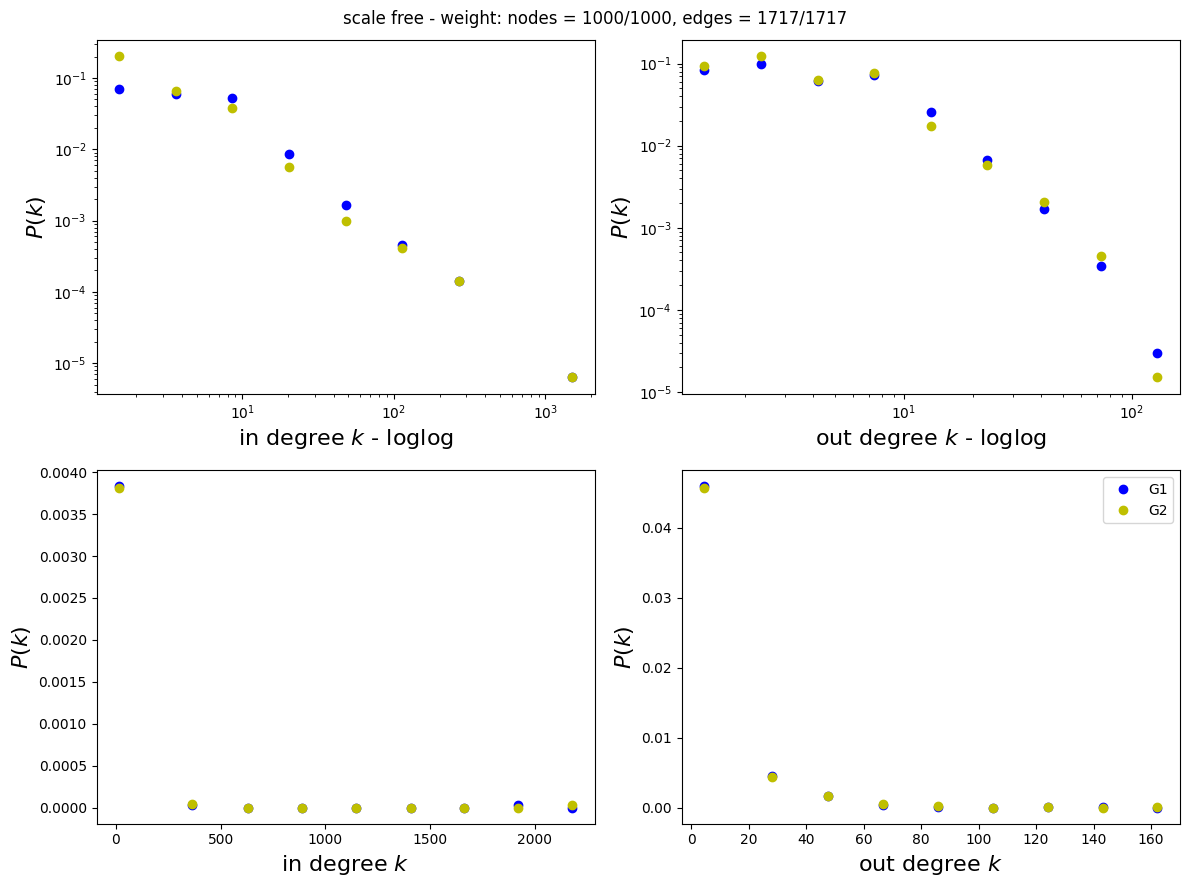

In [81]:
compare_func3(G_orig, G_swap_null, 'scale free', weight='weight')

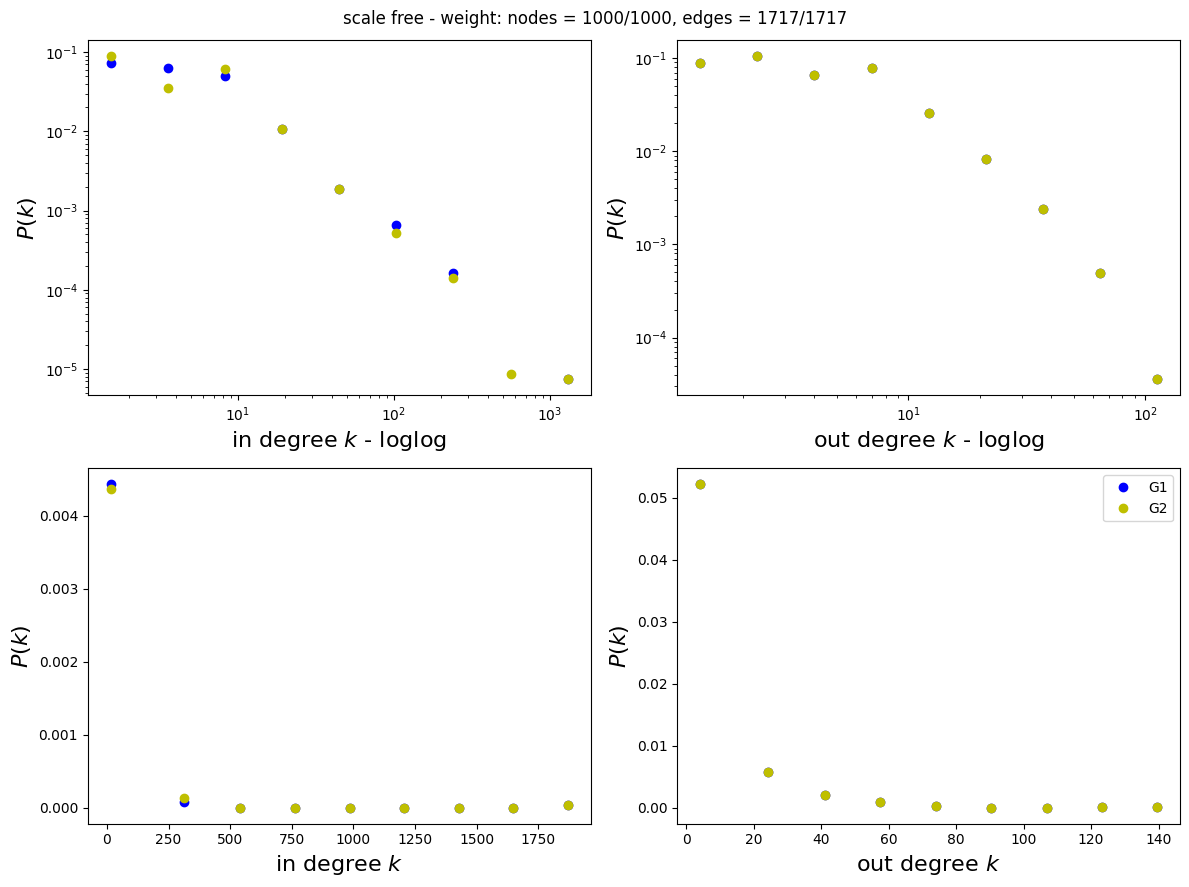

In [82]:
compare_func3(G_orig, G_swap_randmio, 'scale free', weight='weight')

## Editing Networkx

Going back to the networkx but we're editing the code to include the weights.

### going for double edge swap

In [24]:
from networkx.utils import py_random_state

@py_random_state(3)
def our_double_swap(G, *, nswap=1, max_tries=100, seed=None, keep=None, ):
    """Swap three edges in a directed graph while keeping the node degrees fixed.
    """
    
    if nswap > max_tries:
        raise Exception("Number of swaps > number of tries allowed.")
    if len(G) < 4:
        raise Exception("DiGraph has fewer than four nodes.")
    if len(G.edges) < 2:
        raise Exception("DiGraph has fewer than 2 edges")
    if keep not in ['in', 'out', None]:
        raise Exception("keep should be any of the following: 'in', 'out', None")

    # Instead of choosing uniformly at random from a generated edge list,
    # this algorithm chooses nonuniformly from the set of nodes with
    # probability weighted by degree.
    tries = 0
    swapcount = 0
    keys, degrees = zip(*G.degree())  # keys, degree
    cdf = nx.utils.cumulative_distribution(degrees)  # cdf of degree
    discrete_sequence = nx.utils.discrete_sequence

    while swapcount < nswap:
        # choose source node index from discrete distribution
        starting_points = discrete_sequence(2, cdistribution=cdf, seed=seed)\

        start1 = keys[starting_points[0]]
        start2 = keys[starting_points[1]]
        tries += 1

        if tries > max_tries:
            msg = f"Maximum number of swap attempts ({tries}) exceeded before desired swaps achieved ({nswap})."
            raise Exception(msg)

        # If the two chosen outgoing nodes are the same, skip.
        if starting_points[0] == starting_points[1]:
            continue
            
        # If the given node doesn't have any out edges, then there isn't anything to swap
        if G.out_degree(start1) == 0:
            continue
        end1 = seed.choice(list(G.succ[start1]))
        if start1 == end1: # won't happen, no self-loop
            continue

        if G.out_degree(start2) == 0:
            continue
        end2 = seed.choice(list(G.succ[start2]))
        if start2 == end2: # won't happen, no self-loop
            continue

        if ( 
            end2 not in G.succ[start1]
            and end1 not in G.succ[start2]
        ):
            # Swap nodes
            att_ab, att_cd = G.edges[(start1, end1)], G.edges[(start2, end2)]

            if keep is None:
                G.add_edge(start1, end2)
                G.add_edge(start2, end1)
                
            elif keep == 'in':
                G.add_edge(start1, end2, **att_cd)
                G.add_edge(start2, end1, **att_ab)

            else: # out
                G.add_edge(start1, end2, **att_ab)
                G.add_edge(start2, end1, **att_cd)

            G.remove_edge(start1, end1)
            G.remove_edge(start2, end2)
                
            swapcount += 1

    return G

In [29]:
G_swap_new = our_double_swap(G.copy(), nswap=G.number_of_edges(), max_tries=10 * G.number_of_edges(), keep='in')

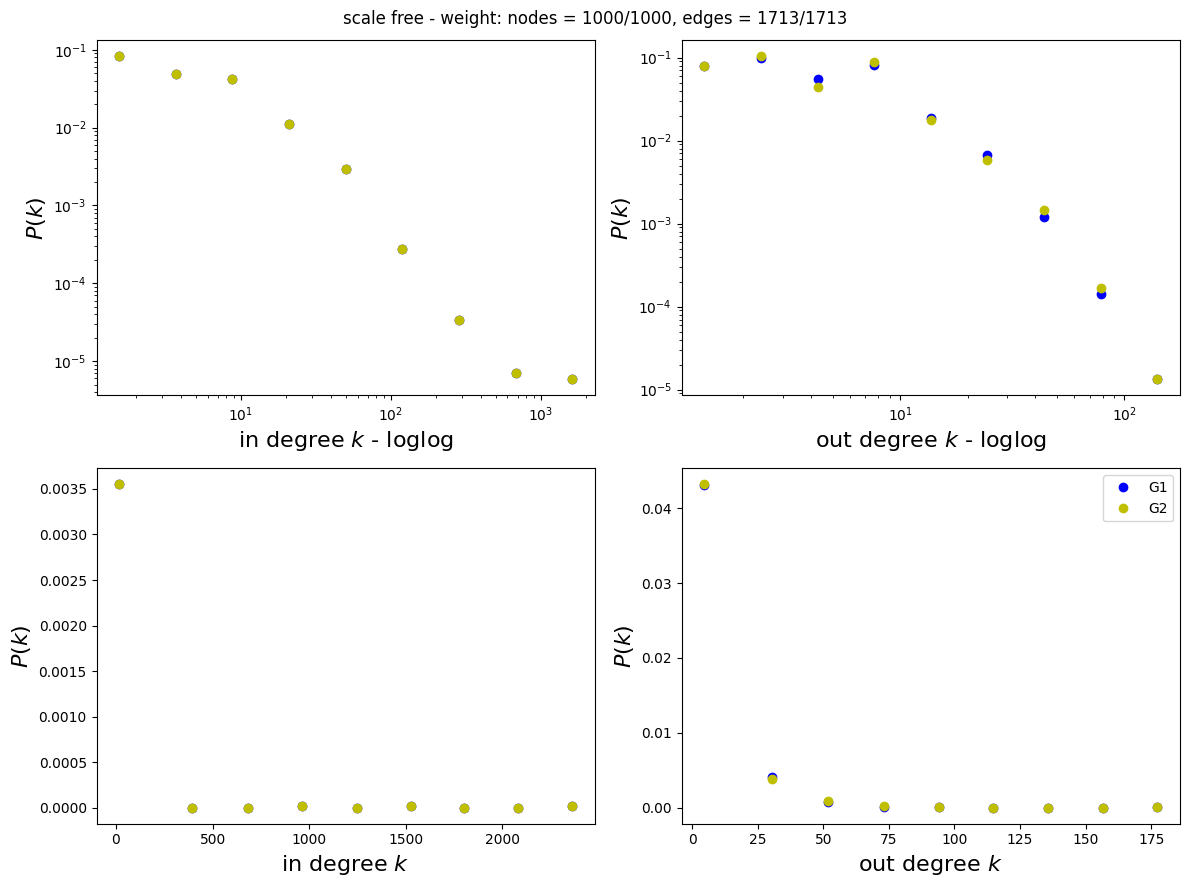

In [30]:
compare_func3(G, G_swap_new, 'scale free', weight='weight')

### going for triple edge swap

In [194]:
from networkx.utils import py_random_state

@py_random_state(3)
def our_triple_swap(G, *, nswap=1, max_tries=100, seed=None, keep=None):
    """Swap three edges in a directed graph while keeping the node degrees fixed.
    """
    
    if nswap > max_tries:
        raise Exception("Number of swaps > number of tries allowed.")
    if len(G) < 4:
        raise Exception("DiGraph has fewer than four nodes.")
    if len(G.edges) < 3:
        raise Exception("DiGraph has fewer than 3 edges")
    if keep not in ['in', 'out', None]:
        raise Exception("keep should be any of the following: 'in', 'out', None")

    # Instead of choosing uniformly at random from a generated edge list,
    # this algorithm chooses nonuniformly from the set of nodes with
    # probability weighted by degree.
    tries = 0
    swapcount = 0
    keys, degrees = zip(*G.degree())  # keys, degree
    cdf = nx.utils.cumulative_distribution(degrees)  # cdf of degree
    discrete_sequence = nx.utils.discrete_sequence

    while swapcount < nswap:
        # choose source node index from discrete distribution
        start_index = discrete_sequence(1, cdistribution=cdf, seed=seed)[0]
        start = keys[start_index]
        tries += 1

        if tries > max_tries:
            msg = f"Maximum number of swap attempts ({tries}) exceeded before desired swaps achieved ({nswap})."
            raise Exception(msg)

        # If the given node doesn't have any out edges, then there isn't anything to swap
        if G.out_degree(start) == 0:
            continue
        second = seed.choice(list(G.succ[start]))
        if start == second:
            continue

        if G.out_degree(second) == 0:
            continue
        third = seed.choice(list(G.succ[second]))
        if second == third:
            continue

        if G.out_degree(third) == 0:
            continue
        fourth = seed.choice(list(G.succ[third]))
        if third == fourth:
            continue

        if (
            third not in G.succ[start]
            and fourth not in G.succ[second]
            and second not in G.succ[third]
        ):
            # Swap nodes
            att12, att23, att34 = G.edges[(start, second)], G.edges[(second, third)], G.edges[(third, fourth)]

            if keep is None:
                G.add_edge(start, third)
                G.add_edge(third, second)
                G.add_edge(second, fourth)
                
            elif keep == 'in':
                G.add_edge(start, third, **att23)
                G.add_edge(third, second, **att12)
                G.add_edge(second, fourth, **att34)

            else: # out
                G.add_edge(start, third, **att12)
                G.add_edge(third, second, **att34)
                G.add_edge(second, fourth, **att23)

            G.remove_edge(start, second)
            G.remove_edge(second, third)
            G.remove_edge(third, fourth)
                
            swapcount += 1

    return G

In [22]:
G_swap_new = our_triple_swap(G.copy(), nswap=G.number_of_edges(), max_tries=10 * G.number_of_edges(), keep='out')

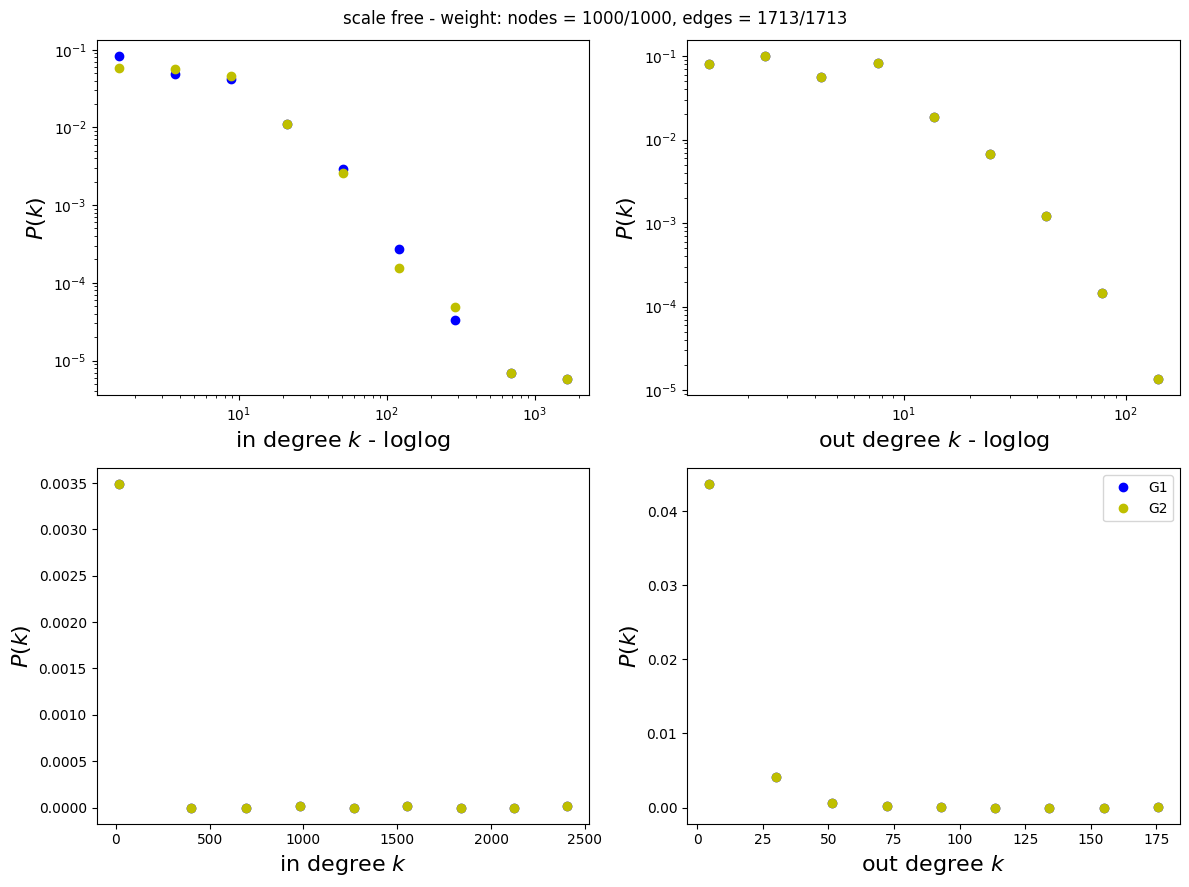

In [23]:
compare_func3(G, G_swap_new, 'scale free', weight='weight')

## Now lets factor distances in

### double edge swap

In [275]:
from networkx.utils import py_random_state

key_to_ind = {ind:ind for ind in range(N)}
ind_to_key = {ind:ind for ind in range(N)}
distance_matrix = 1 + 9 * np.random.random((N,N))

@py_random_state(3)
def our_double_swap_distances(G, *, nswap=1, max_tries=100, seed=None, keep=None):
    """Swap three edges in a directed graph while keeping the node degrees fixed.
    """

    def get_near_successor(G, key):

        if G.out_degree(key) == 0:
            return None
            
        start_ind = key_to_ind[key]
        succ_inds = [key_to_ind[succ] for succ in list(G.succ[key])]

        full_distances = distance_matrix[start_ind, :]
        mask = np.ones(len(full_distances), dtype=bool)
        mask[succ_inds] = False
        masked_distances = full_distances.copy()
        masked_distances[mask] = np.inf
        
        masked_chances = 1 / masked_distances

        cdf = nx.utils.cumulative_distribution(masked_chances)

        discrete_sequence = nx.utils.discrete_sequence

        near_successor_index = discrete_sequence(1, cdistribution=cdf, seed=seed)[0]

        return ind_to_key[near_successor_index]

    def get_near_node(G, key):
            
        start_ind = key_to_ind[key]

        full_distances = distance_matrix[start_ind, :]

        masked_distances = full_distances.copy()
        masked_distances[start_ind] = np.inf

        masked_chances = 1 / masked_distances

        cdf = nx.utils.cumulative_distribution(masked_chances)

        discrete_sequence = nx.utils.discrete_sequence

        near_successor_index = discrete_sequence(1, cdistribution=cdf, seed=seed)[0]

        return ind_to_key[near_successor_index]
    
    if nswap > max_tries:
        raise Exception("Number of swaps > number of tries allowed.")
    if len(G) < 4:
        raise Exception("DiGraph has fewer than four nodes.")
    if len(G.edges) < 2:
        raise Exception("DiGraph has fewer than 2 edges")
    if keep not in ['in', 'out', None]:
        raise Exception("keep should be any of the following: 'in', 'out', None")

    # Instead of choosing uniformly at random from a generated edge list,
    # this algorithm chooses nonuniformly from the set of nodes with
    # probability weighted by degree.
    tries = 0
    swapcount = 0
    keys, degrees = zip(*G.degree())  # keys, degree
    cdf = nx.utils.cumulative_distribution(degrees)  # cdf of degree
    discrete_sequence = nx.utils.discrete_sequence

    while swapcount < nswap:
        # choose source node index from discrete distribution
        start1_index = discrete_sequence(1, cdistribution=cdf, seed=seed)[0]
        start1 = keys[start1_index]

        start2 = get_near_node(G, start1)

        tries += 1

        if tries > max_tries:
            msg = f"Maximum number of swap attempts ({tries}) exceeded before desired swaps achieved ({nswap})."
            raise Exception(msg)

        # If the two chosen outgoing nodes are the same, skip.
        if start1 == start2:
            continue
            
        # If the given node doesn't have any out edges, then there isn't anything to swap
        if G.out_degree(start1) == 0:
            continue
        # end1 = seed.choice(list(G.succ[start1]))
        end1 = get_near_successor(G, start1)
        if start1 == end1: # won't happen, no self-loop
            continue

        if G.out_degree(start2) == 0:
            continue
        # end2 = seed.choice(list(G.succ[start2]))
        end2 = get_near_successor(G, start2)
        if start2 == end2: # won't happen, no self-loop
            continue

        if ( 
            end2 not in G.succ[start1]
            and end1 not in G.succ[start2]
        ):
            # Swap nodes
            att_ab, att_cd = G.edges[(start1, end1)], G.edges[(start2, end2)]

            if keep is None:
                G.add_edge(start1, end2)
                G.add_edge(start2, end1)
                
            elif keep == 'in':
                G.add_edge(start1, end2, **att_cd)
                G.add_edge(start2, end1, **att_ab)

            else: # out
                G.add_edge(start1, end2, **att_ab)
                G.add_edge(start2, end1, **att_cd)

            G.remove_edge(start1, end1)
            G.remove_edge(start2, end2)
                
            swapcount += 1

    return G

In [9]:
G_swap_new = our_double_swap_distances(G.copy(), nswap=G.number_of_edges(), max_tries=10 * G.number_of_edges(), keep='out')

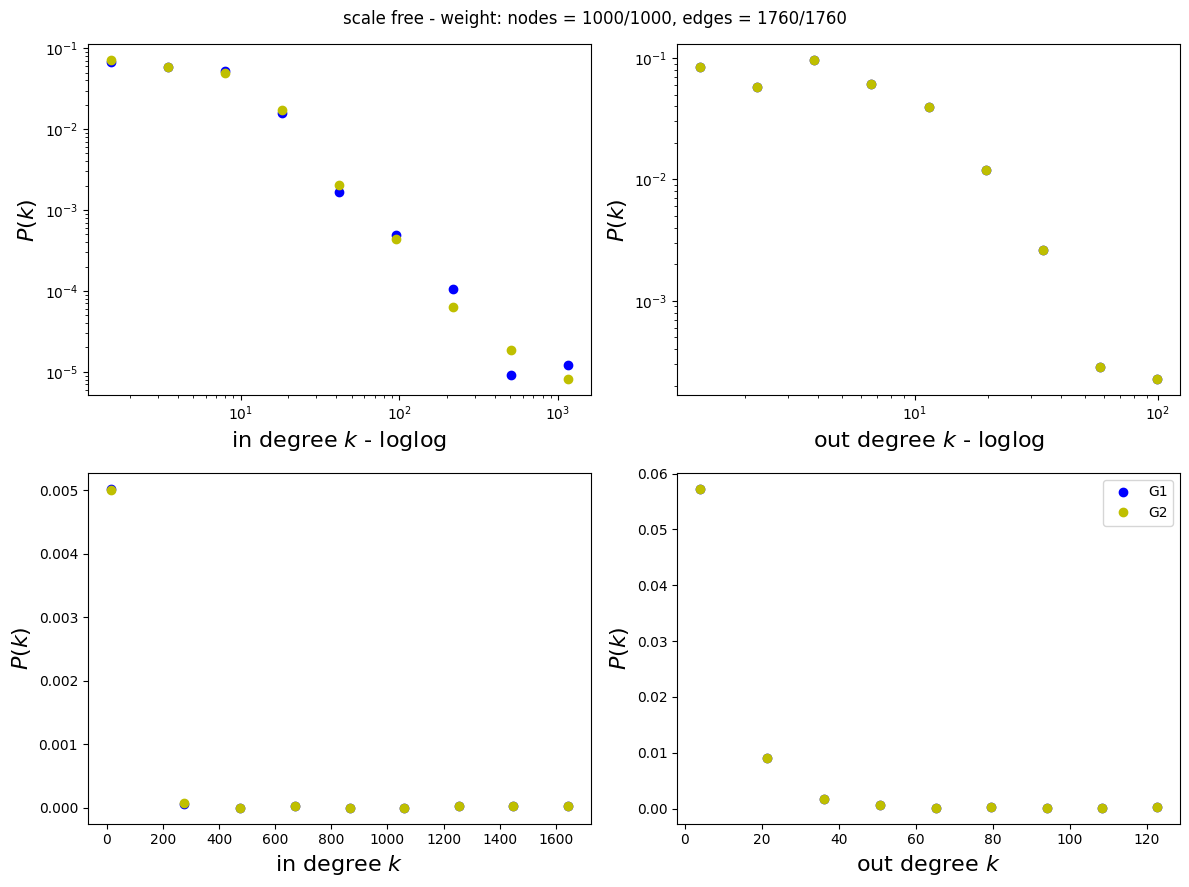

In [10]:
compare_func3(G, G_swap_new, 'scale free', weight='weight')

### triple_edge_swap

In [276]:
from networkx.utils import py_random_state

key_to_ind = {ind:ind for ind in range(N)}
ind_to_key = {ind:ind for ind in range(N)}
distance_matrix = 1 + 9 * np.random.random((N,N))

@py_random_state(3)
def our_triple_swap_distances(G, *, nswap=1, max_tries=100, seed=None, keep=None):
    """Swap three edges in a directed graph while keeping the node degrees fixed.
    """

    def get_near_successor(G, key):

        if G.out_degree(key) == 0:
            return None
            
        start_ind = key_to_ind[key]
        succ_inds = [key_to_ind[succ] for succ in list(G.succ[key])]

        full_distances = distance_matrix[start_ind, :]
        mask = np.ones(len(full_distances), dtype=bool)
        mask[succ_inds] = False
        masked_distances = full_distances.copy()
        masked_distances[mask] = np.inf
        
        masked_chances = 1 / masked_distances

        cdf = nx.utils.cumulative_distribution(masked_chances)

        discrete_sequence = nx.utils.discrete_sequence

        near_successor_index = discrete_sequence(1, cdistribution=cdf, seed=seed)[0]

        return ind_to_key[near_successor_index]
    
    if nswap > max_tries:
        raise Exception("Number of swaps > number of tries allowed.")
    if len(G) < 4:
        raise Exception("DiGraph has fewer than four nodes.")
    if len(G.edges) < 3:
        raise Exception("DiGraph has fewer than 3 edges")
    if keep not in ['in', 'out', None]:
        raise Exception("keep should be any of the following: 'in', 'out', None")

    # Instead of choosing uniformly at random from a generated edge list,
    # this algorithm chooses nonuniformly from the set of nodes with
    # probability weighted by degree.
    tries = 0
    swapcount = 0
    keys, degrees = zip(*G.degree())  # keys, degree
    cdf = nx.utils.cumulative_distribution(degrees)  # cdf of degree
    discrete_sequence = nx.utils.discrete_sequence

    while swapcount < nswap:
        # choose source node index from discrete distribution
        start_index = discrete_sequence(1, cdistribution=cdf, seed=seed)[0]
        start = keys[start_index]
        tries += 1

        if tries > max_tries:
            msg = f"Maximum number of swap attempts ({tries}) exceeded before desired swaps achieved ({nswap})."
            raise Exception(msg)

        # If the given node doesn't have any out edges, then there isn't anything to swap
        if G.out_degree(start) == 0:
            continue
        # second = seed.choice(list(G.succ[start]))
        second = get_near_successor(G, start)
        if start == second:
            continue

        if G.out_degree(second) == 0:
            continue
        # third = seed.choice(list(G.succ[second]))
        third = get_near_successor(G, second)
        if second == third:
            continue

        if G.out_degree(third) == 0:
            continue
        # fourth = seed.choice(list(G.succ[third]))
        fourth = get_near_successor(G, third)
        if third == fourth:
            continue

        if (
            third not in G.succ[start]
            and fourth not in G.succ[second]
            and second not in G.succ[third]
        ):
            # Swap nodes
            att12, att23, att34 = G.edges[(start, second)], G.edges[(second, third)], G.edges[(third, fourth)]

            if keep is None:
                G.add_edge(start, third)
                G.add_edge(third, second)
                G.add_edge(second, fourth)
                
            elif keep == 'in':
                G.add_edge(start, third, **att23)
                G.add_edge(third, second, **att12)
                G.add_edge(second, fourth, **att34)

            else: # out
                G.add_edge(start, third, **att12)
                G.add_edge(third, second, **att34)
                G.add_edge(second, fourth, **att23)

            G.remove_edge(start, second)
            G.remove_edge(second, third)
            G.remove_edge(third, fourth)
                
            swapcount += 1

    return G

In [277]:
G_swap_new = our_triple_swap_distances(G.copy(), nswap=G.number_of_edges(), max_tries=20 * G.number_of_edges(), keep=None)

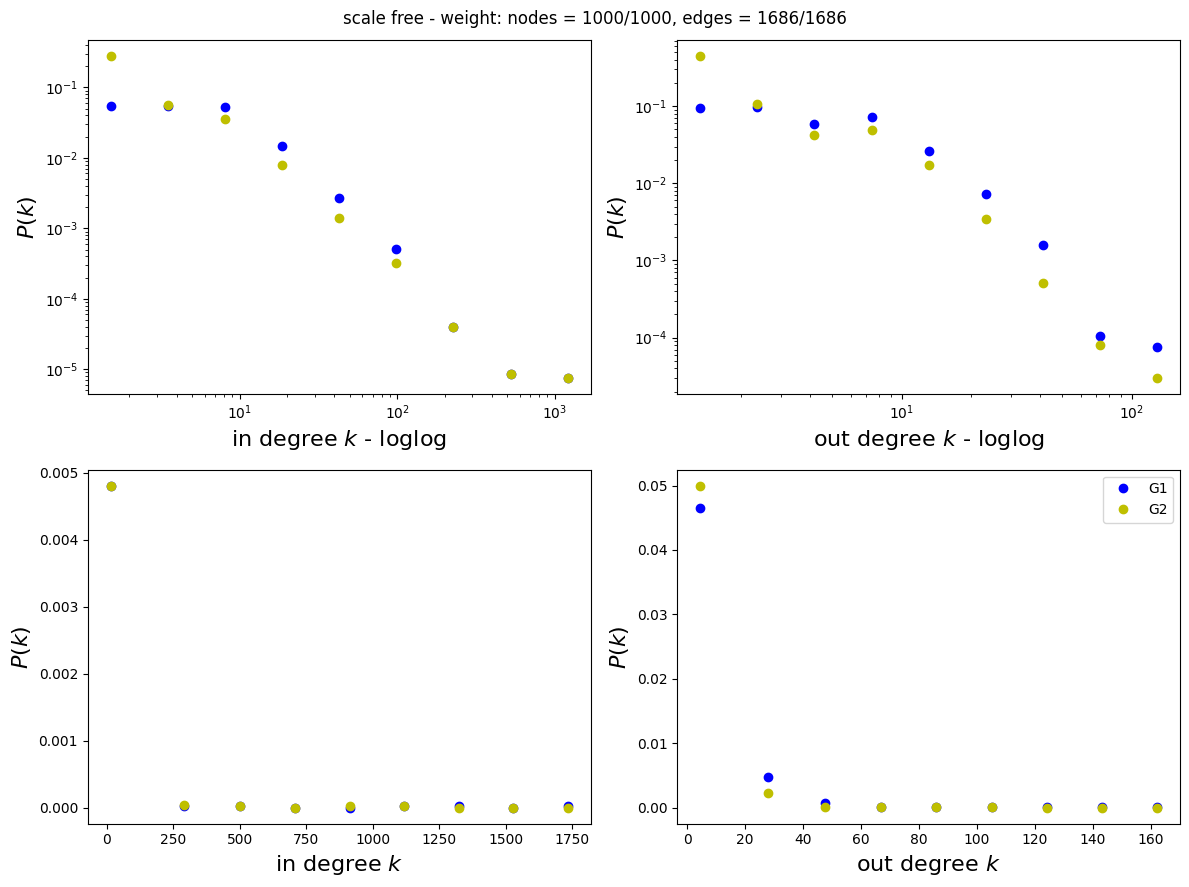

In [278]:
compare_func3(G, G_swap_new, 'scale free', weight='weight')

In [279]:
from scipy.stats import pearsonr

x_in = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G.in_edges(data=True))])
y_in = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G_swap_new.in_edges(data=True))])

x_out = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G.edges(data=True))])
y_out = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G_swap_new.edges(data=True))])

print(pearsonr(x_in, y_in))
print(pearsonr(x_out, y_out))

PearsonRResult(statistic=0.9040954800931341, pvalue=0.0)
PearsonRResult(statistic=0.9040954800931341, pvalue=0.0)


In [280]:
from scipy.stats import pearsonr

x_in = [s_in for (node, s_in) in sorted(list(G.in_degree(weight='weight')))]
y_in = [s_in for (node, s_in) in sorted(list(G_swap_new.in_degree(weight='weight')))]

x_out = [s_out for (node, s_out) in sorted(list(G.out_degree(weight='weight')))]
y_out = [s_out for (node, s_out) in sorted(list(G_swap_new.out_degree(weight='weight')))]
              
print(pearsonr(x_in, y_in))
print(pearsonr(x_out, y_out))

PearsonRResult(statistic=0.9932110385412888, pvalue=0.0)
PearsonRResult(statistic=0.8051658944560998, pvalue=1.0990415373141826e-228)


### does distance actually make a difference

In [333]:
from itertools import combinations, permutations

key_to_ind = {ind:ind for ind in range(N)}
ind_to_key = {ind:ind for ind in range(N)}
distance_matrix = 1 + 9 * np.random.random((N,N))

def get_average_distance(keys):
    indices = [key_to_ind[key] for key in keys]
    pairs = list(permutations(indices, 2)) # should use permutations for asymmetric and combinations for symmetric
    distances = [distance_matrix[pair] for pair in pairs]
    return sum(distances)/len(distances)

In [337]:
from networkx.utils import py_random_state

@py_random_state(3)
def t_our_double_swap(G, *, nswap=1, max_tries=100, seed=None, keep=None):
    """Swap three edges in a directed graph while keeping the node degrees fixed.
    """
    
    if nswap > max_tries:
        raise Exception("Number of swaps > number of tries allowed.")
    if len(G) < 4:
        raise Exception("DiGraph has fewer than four nodes.")
    if len(G.edges) < 2:
        raise Exception("DiGraph has fewer than 2 edges")
    if keep not in ['in', 'out', None]:
        raise Exception("keep should be any of the following: 'in', 'out', None")

    # Instead of choosing uniformly at random from a generated edge list,
    # this algorithm chooses nonuniformly from the set of nodes with
    # probability weighted by degree.
    tries = 0
    swapcount = 0
    keys, degrees = zip(*G.degree())  # keys, degree
    cdf = nx.utils.cumulative_distribution(degrees)  # cdf of degree
    discrete_sequence = nx.utils.discrete_sequence

    distance_dist = []

    while swapcount < nswap:
        # choose source node index from discrete distribution
        starting_points = discrete_sequence(2, cdistribution=cdf, seed=seed)

        start1 = keys[starting_points[0]]
        start2 = keys[starting_points[1]]
        tries += 1

        if tries > max_tries:
            msg = f"Maximum number of swap attempts ({tries}) exceeded before desired swaps achieved ({nswap})."
            raise Exception(msg)

        # If the two chosen outgoing nodes are the same, skip.
        if starting_points[0] == starting_points[1]:
            continue
            
        # If the given node doesn't have any out edges, then there isn't anything to swap
        if G.out_degree(start1) == 0:
            continue
        end1 = seed.choice(list(G.succ[start1]))
        if start1 == end1: # won't happen, no self-loop
            continue

        if G.out_degree(start2) == 0:
            continue
        end2 = seed.choice(list(G.succ[start2]))
        if start2 == end2: # won't happen, no self-loop
            continue

        if ( 
            end2 not in G.succ[start1]
            and end1 not in G.succ[start2]
        ):
            # Swap nodes
            att_ab, att_cd = G.edges[(start1, end1)], G.edges[(start2, end2)]

            if keep is None:
                G.add_edge(start1, end2)
                G.add_edge(start2, end1)
                
            elif keep == 'in':
                G.add_edge(start1, end2, **att_cd)
                G.add_edge(start2, end1, **att_ab)

            else: # out
                G.add_edge(start1, end2, **att_ab)
                G.add_edge(start2, end1, **att_cd)

            G.remove_edge(start1, end1)
            G.remove_edge(start2, end2)
                
            swapcount += 1

            distance_dist.append(get_average_distance([start1, end1, start2, end2]))

    return G, distance_dist


In [338]:
@py_random_state(3)
def t_our_double_swap_distances(G, *, nswap=1, max_tries=100, seed=None, keep=None):
    """Swap three edges in a directed graph while keeping the node degrees fixed.
    """

    def get_near_successor(G, key):

        if G.out_degree(key) == 0:
            return None
            
        start_ind = key_to_ind[key]
        succ_inds = [key_to_ind[succ] for succ in list(G.succ[key])]

        full_distances = distance_matrix[start_ind, :]
        mask = np.ones(len(full_distances), dtype=bool)
        mask[succ_inds] = False
        masked_distances = full_distances.copy()
        masked_distances[mask] = np.inf
        
        masked_chances = 1 / masked_distances

        cdf = nx.utils.cumulative_distribution(masked_chances)

        discrete_sequence = nx.utils.discrete_sequence

        near_successor_index = discrete_sequence(1, cdistribution=cdf, seed=seed)[0]

        return ind_to_key[near_successor_index]

    def get_near_node(G, key):
            
        start_ind = key_to_ind[key]

        full_distances = distance_matrix[start_ind, :]

        masked_distances = full_distances.copy()
        masked_distances[start_ind] = np.inf

        masked_chances = 1 / masked_distances

        cdf = nx.utils.cumulative_distribution(masked_chances)

        discrete_sequence = nx.utils.discrete_sequence

        near_successor_index = discrete_sequence(1, cdistribution=cdf, seed=seed)[0]

        return ind_to_key[near_successor_index]
    
    if nswap > max_tries:
        raise Exception("Number of swaps > number of tries allowed.")
    if len(G) < 4:
        raise Exception("DiGraph has fewer than four nodes.")
    if len(G.edges) < 2:
        raise Exception("DiGraph has fewer than 2 edges")
    if keep not in ['in', 'out', None]:
        raise Exception("keep should be any of the following: 'in', 'out', None")

    # Instead of choosing uniformly at random from a generated edge list,
    # this algorithm chooses nonuniformly from the set of nodes with
    # probability weighted by degree.
    tries = 0
    swapcount = 0
    keys, degrees = zip(*G.degree())  # keys, degree
    cdf = nx.utils.cumulative_distribution(degrees)  # cdf of degree
    discrete_sequence = nx.utils.discrete_sequence

    distance_dist = []

    while swapcount < nswap:
        # choose source node index from discrete distribution
        start1_index = discrete_sequence(1, cdistribution=cdf, seed=seed)[0]
        start1 = keys[start1_index]

        start2 = get_near_node(G, start1)

        tries += 1

        if tries > max_tries:
            msg = f"Maximum number of swap attempts ({tries}) exceeded before desired swaps achieved ({nswap})."
            raise Exception(msg)

        # If the two chosen outgoing nodes are the same, skip.
        if start1 == start2:
            continue
            
        # If the given node doesn't have any out edges, then there isn't anything to swap
        if G.out_degree(start1) == 0:
            continue
        # end1 = seed.choice(list(G.succ[start1]))
        end1 = get_near_successor(G, start1)
        if start1 == end1: # won't happen, no self-loop
            continue

        if G.out_degree(start2) == 0:
            continue
        # end2 = seed.choice(list(G.succ[start2]))
        end2 = get_near_successor(G, start2)
        if start2 == end2: # won't happen, no self-loop
            continue

        if ( 
            end2 not in G.succ[start1]
            and end1 not in G.succ[start2]
        ):
            # Swap nodes
            att_ab, att_cd = G.edges[(start1, end1)], G.edges[(start2, end2)]

            if keep is None:
                G.add_edge(start1, end2)
                G.add_edge(start2, end1)
                
            elif keep == 'in':
                G.add_edge(start1, end2, **att_cd)
                G.add_edge(start2, end1, **att_ab)

            else: # out
                G.add_edge(start1, end2, **att_ab)
                G.add_edge(start2, end1, **att_cd)

            G.remove_edge(start1, end1)
            G.remove_edge(start2, end2)
                
            swapcount += 1

            distance_dist.append(get_average_distance([start1, end1, start2, end2]))

    return G, distance_dist

In [354]:
all_no_distance = []
for i in range(100):
    _, dist_no_distance = t_our_double_swap(G.copy(), nswap=G.number_of_edges(), max_tries=10 * G.number_of_edges(), keep=None)
    all_no_distance.extend(dist_no_distance)

all_with_distance = []
for i in range(100):
    _, dist_with_distance = t_our_double_swap_distances(G.copy(), nswap=G.number_of_edges(), max_tries=10 * G.number_of_edges(), keep=None)
    all_with_distance.extend(dist_with_distance)

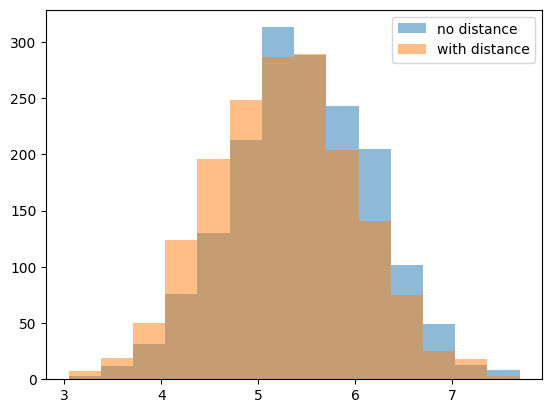

In [355]:
bins = np.linspace(min(min(dist_no_distance), min(dist_with_distance)), max(max(dist_no_distance), max(dist_with_distance)), 15)

plt.hist(dist_no_distance, bins, alpha=0.5, label='no distance')
plt.hist(dist_with_distance, bins, alpha=0.5, label='with distance')
plt.legend(loc='upper right')
plt.show()


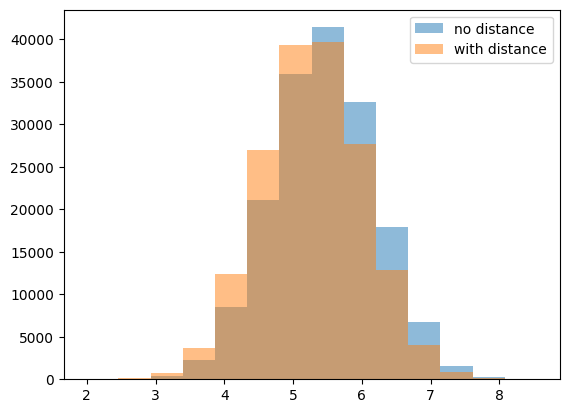

In [356]:
bins = np.linspace(min(min(all_no_distance), min(all_with_distance)), max(max(all_no_distance), max(all_with_distance)), 15)

plt.hist(all_no_distance, bins, alpha=0.5, label='no distance')
plt.hist(all_with_distance, bins, alpha=0.5, label='with distance')
plt.legend(loc='upper right')
plt.show()


In [358]:
print("No Distance: Mean =", np.mean(all_no_distance), "Std Dev =", np.std(all_no_distance))
print("With Distance: Mean =", np.mean(all_with_distance), "Std Dev =", np.std(all_with_distance))

No Distance: Mean = 5.451993032849961 Std Dev = 0.7415949078364639
With Distance: Mean = 5.2815561534273545 Std Dev = 0.7397842127340621


In [360]:
import scipy.stats as stats

t_stat, p_value = stats.ttest_ind(all_no_distance, all_with_distance, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 66.80970058642647
P-value: 0.0


## use rubinov-sporns algorithm to assign weights

In [216]:
from collections import Counter

def transfer_weights_rubinov_sporns(G_source, G_dest, weight_name='weight'):

    in_strengths = dict(G_source.in_degree(weight=weight_name))
    out_strengths = dict(G_source.out_degree(weight=weight_name))

    nx.set_edge_attributes(G_dest, 0, name=weight_name)

    to_be_assigned = sorted([edge[2][weight_name] for edge in list(G_source.edges(data=True))]) # increasing

    to_be_weighted = list(G_dest.edges())

    # find the highest expected strength diff (how can this go wrong?)    
    while len(to_be_weighted) > 0:
    
        in_strengths_current = Counter()
        out_strengths_current = Counter()
        
        for u, v, atts in G_dest.edges(data=True):
            out_strengths_current[u] += atts[weight_name]
            in_strengths_current[v] += atts[weight_name]
        
        highest_eij = -np.inf
        ij = None
        
        for (u, v) in to_be_weighted:
            new_eij = (out_strengths[u] - out_strengths_current[u]) * (in_strengths[v] - in_strengths_current[v])
        
            if new_eij > highest_eij:
                ij = (u, v)
                highest_eij = new_eij
    
        nx.set_edge_attributes(G_dest, {ij: to_be_assigned.pop()}, 'weight')
        to_be_weighted.remove(ij)

    

In [221]:
transfer_weights_rubinov_sporns(G, G_swap_new, 'weight')

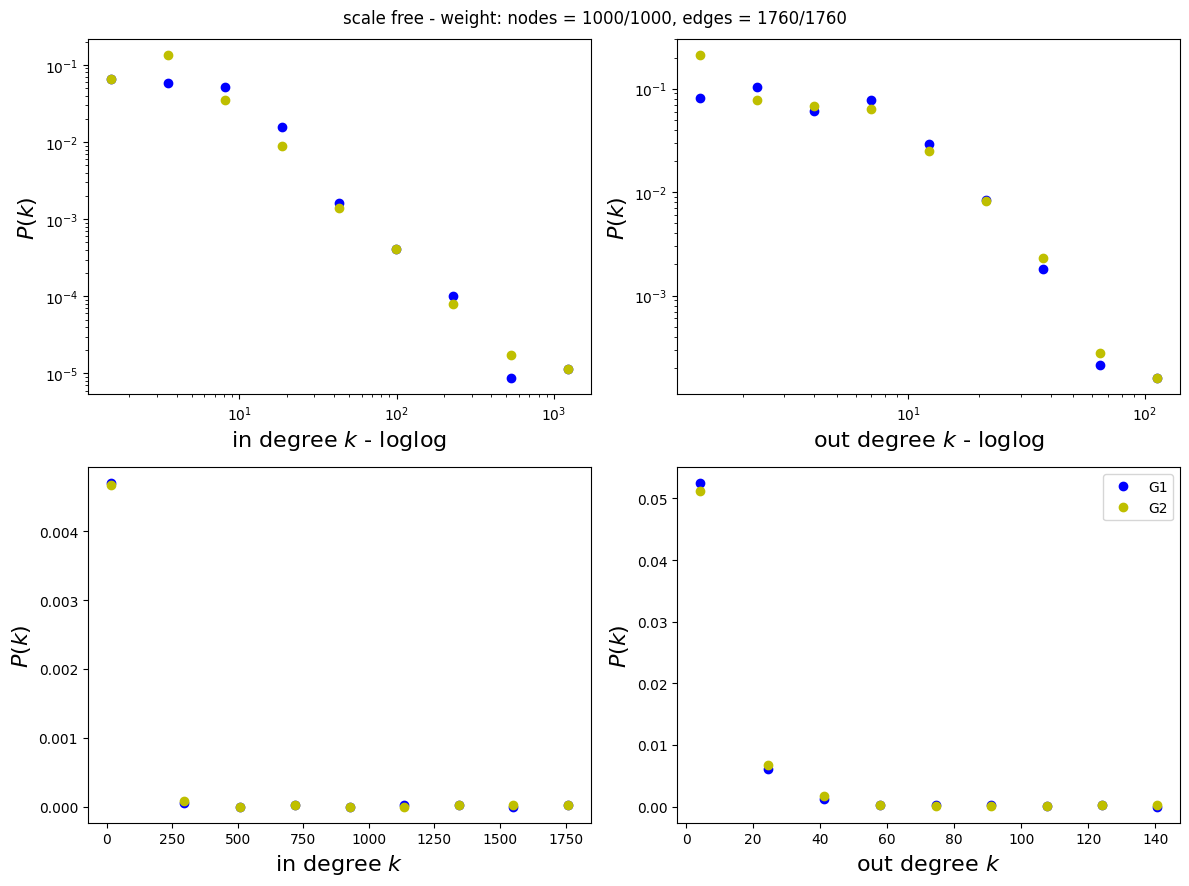

In [222]:
compare_func3(G, G_swap_new, 'scale free', weight='weight')

In [224]:
from scipy.stats import pearsonr

x_in = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G.in_edges(data=True))])
y_in = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G_swap_new.in_edges(data=True))])

x_out = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G.edges(data=True))])
y_out = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G_swap_new.edges(data=True))])

print(pearsonr(x_in, y_in))
print(pearsonr(x_out, y_out))

PearsonRResult(statistic=0.9999999999999997, pvalue=0.0)
PearsonRResult(statistic=0.9999999999999997, pvalue=0.0)


In [223]:
from scipy.stats import pearsonr

x_in = [s_in for (node, s_in) in sorted(list(G.in_degree(weight='weight')))]
y_in = [s_in for (node, s_in) in sorted(list(G_swap_new.in_degree(weight='weight')))]

x_out = [s_out for (node, s_out) in sorted(list(G.out_degree(weight='weight')))]
y_out = [s_out for (node, s_out) in sorted(list(G_swap_new.out_degree(weight='weight')))]
              
print(pearsonr(x_in, y_in))
print(pearsonr(x_out, y_out))

PearsonRResult(statistic=0.9994947653426633, pvalue=0.0)
PearsonRResult(statistic=0.9838828606005912, pvalue=0.0)


## simulated annealing strength preserving milislav et al.

In [225]:
!pip install netneurotools

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 256.6 kB/s eta 0:00:001m2.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 8.3 MB/s eta 0:00:000m eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 6.2 MB/s eta 0:00:000m eta 0:00:010:00:01
  Attempting uninstall: nibabel
    Found existing installation: nibabel 5.1.0
    Uninstalling nibabel-5.1.0:
      Successfully uninstalled nibabel-5.1.0

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [281]:
# https://netneurotools.readthedocs.io/en/latest/generated/netneurotools.networks.strength_preserving_rand_sa_dir.html#netneurotools.networks.strength_preserving_rand_sa_dir
from netneurotools.networks import strength_preserving_rand_sa_dir

A = nx.to_numpy_array(G, weight='weight')

## setting seed makes B reproducible which means we can reproduce the rewiring using seed which means we can use 
## this function to swap strength of different weight types but the same rewiring.
B, _ = strength_preserving_rand_sa_dir(A) 

annealing progress: 100%|█████████████████████| 100/100 [00:28<00:00,  3.54it/s]


In [282]:
G_swap_annealing = nx.empty_graph(0, nx.DiGraph)
G_swap_annealing.add_nodes_from(range(B.shape[0]))
G_swap_annealing.add_edges_from([(e[0], e[1], {'weight': B[e]}) for e in zip(*B.nonzero())])

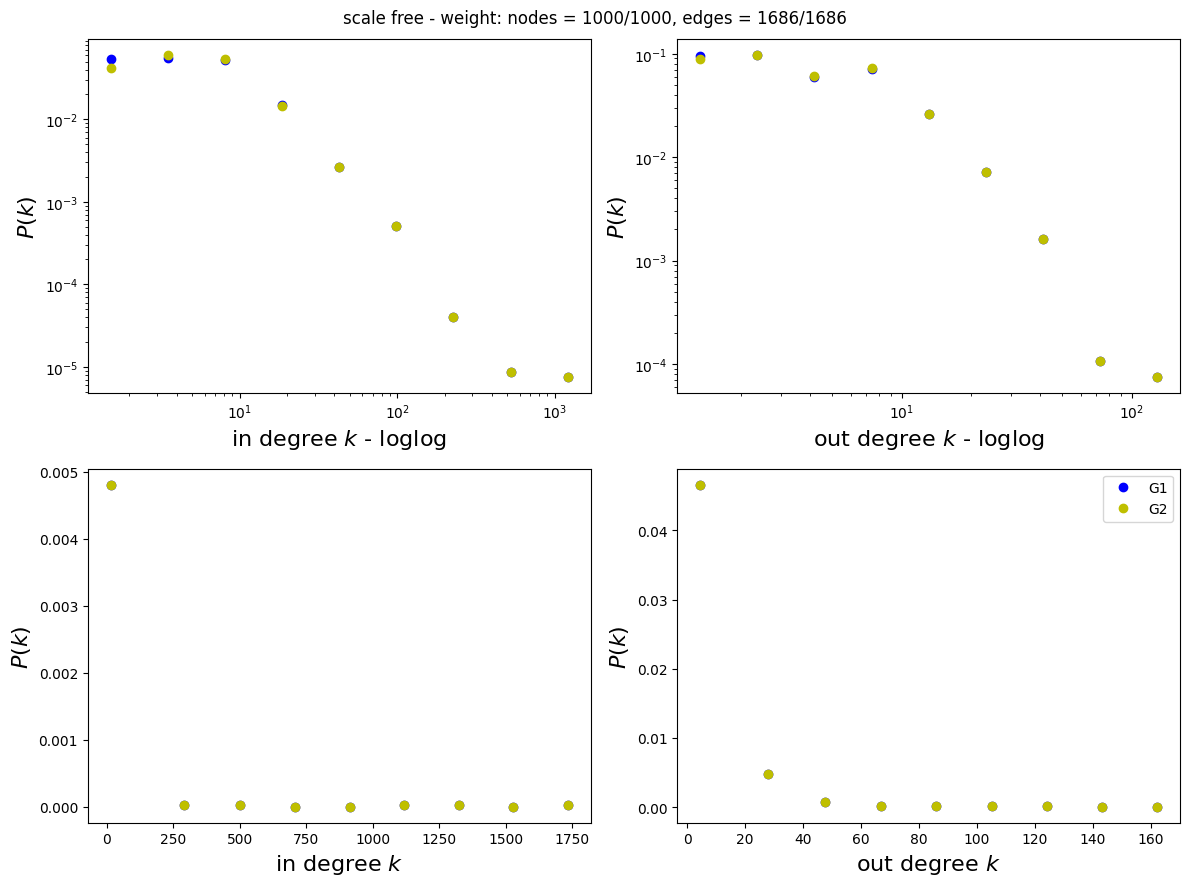

In [283]:
compare_func3(G, G_swap_annealing, 'scale free', weight='weight')

In [284]:
from scipy.stats import pearsonr

x_in = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G.in_edges(data=True))])
y_in = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G_swap_annealing.in_edges(data=True))])

x_out = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G.edges(data=True))])
y_out = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G_swap_annealing.edges(data=True))])

print(pearsonr(x_in, y_in))
print(pearsonr(x_out, y_out))

PearsonRResult(statistic=1.0, pvalue=0.0)
PearsonRResult(statistic=1.0, pvalue=0.0)


In [285]:
from scipy.stats import pearsonr

x_in = [s_in for (node, s_in) in sorted(list(G.in_degree(weight='weight')))]
y_in = [s_in for (node, s_in) in sorted(list(G_swap_annealing.in_degree(weight='weight')))]

x_out = [s_out for (node, s_out) in sorted(list(G.out_degree(weight='weight')))]
y_out = [s_out for (node, s_out) in sorted(list(G_swap_annealing.out_degree(weight='weight')))]
              
print(pearsonr(x_in, y_in))
print(pearsonr(x_out, y_out))

PearsonRResult(statistic=0.9999885575074203, pvalue=0.0)
PearsonRResult(statistic=0.9994057742432669, pvalue=0.0)


## what about distance! (our rewiring with their simulated annealing)

In [286]:
import bct
import numpy as np
from tqdm import tqdm
from sklearn.utils.validation import check_random_state

In [298]:
def strength_preserving_rand_sa_dir_dist(
    G, #A,
    keep='weight',
    rewiring_iter=10,
    nstage=100,
    niter=10000,
    temp=1000,
    frac=0.5,
    energy_type="sse",
    energy_func=None,
    connected=True,
    verbose=False,
    seed=None,
):
    """
    Strength-preserving network randomization using simulated annealing.

    Randomize a directed weighted network, while preserving
    the in- and out-degree and strength sequences using simulated annealing.

    Parameters
    ----------
    A : (N, N) array-like
        Directed weighted connectivity matrix
    rewiring_iter : int, optional
        Rewiring parameter. Default = 10.
        Each edge is rewired approximately rewiring_iter times.
    nstage : int, optional
        Number of annealing stages. Default = 100.
    niter : int, optional
        Number of iterations per stage. Default = 10000.
    temp : float, optional
        Initial temperature. Default = 1000.
    frac : float, optional
        Fractional decrease in temperature per stage. Default = 0.5.
    energy_type: str, optional
        Energy function to minimize. Can be either:
            'sse': Sum of squared errors between strength sequence vectors
                   of the original network and the randomized network
            'max': Maximum absolute error
            'mae': Mean absolute error
            'mse': Mean squared error
            'rmse': Root mean squared error
        Default = 'sse'.
    energy_func: callable, optional
        Callable with two positional arguments corresponding to
        two strength sequence numpy arrays that returns an energy value.
        Overwrites “energy_type”.
        See “energy_type” for specifying a predefined energy type instead.
    connected: bool, optional
        Whether to ensure connectedness of the randomized network.
        Default = True.
    verbose: bool, optional
        Whether to print status to screen at the end of every stage.
        Default = False.
    seed: float, optional
        Random seed. Default = None.

    Returns
    -------
    B : (N, N) array-like
        Randomized connectivity matrix
    min_energy : float
        Minimum energy obtained by annealing

    Notes
    -----
    Uses Maslov & Sneppen rewiring model to produce a
    surrogate connectivity matrix, B, with the same
    size, density, and in- and out-degree sequences as A.
    The weights are then permuted to optimize the
    match between the strength sequences of A and B
    using simulated annealing.
    Both in- and out-strengths are preserved.

    This function is adapted from a function written in MATLAB
    by Richard Betzel.

    References
    ----------
    Misic, B. et al. (2015) Cooperative and Competitive Spreading Dynamics
    on the Human Connectome. Neuron.
    Rubinov, M. (2016) Constraints and spandrels of interareal connectomes.
    Nature Communications.
    Milisav, F. et al. (2024) A simulated annealing algorithm for
    randomizing weighted networks.
    """
    try:
        # A = np.asarray(A)
        A = nx.to_numpy_array(G, weight=keep)
    except TypeError as err:
        msg = "A must be array_like. Received: {}.".format(type(A))
        raise TypeError(msg) from err

    if frac > 1 or frac <= 0:
        msg = "frac must be between 0 and 1. " "Received: {}.".format(frac)
        raise ValueError(msg)

    rs = check_random_state(seed)

    n = A.shape[0]
    s_in = np.sum(A, axis=0)  # in-strengths of A
    s_out = np.sum(A, axis=1)  # out-strengths of A

    # Maslov & Sneppen rewiring
    # if connected:
    #     B = bct.randmio_dir_connected(A, rewiring_iter, seed=seed)[0]
    # else:
    #     B = bct.randmio_dir(A, rewiring_iter, seed=seed)[0]

    # My own rewiring
    G_swap = our_triple_swap_distances(G.copy(), nswap=G.number_of_edges(), max_tries=20 * G.number_of_edges(), keep='in')
    B = nx.to_numpy_array(G_swap, weight=keep)

    u, v = B.nonzero()  # nonzero indices of B
    wts = B[(u, v)]  # nonzero values of B
    m = len(wts)
    sb_in = np.sum(B, axis=0)  # in-strengths of B
    sb_out = np.sum(B, axis=1)  # out-strengths of B

    if energy_func is not None:
        energy = energy_func(s_in, sb_in) + energy_func(s_out, sb_out)
    elif energy_type == "sse":
        energy = np.sum((s_in - sb_in) ** 2) + np.sum((s_out - sb_out) ** 2)
    elif energy_type == "max":
        energy = np.max(np.abs(s_in - sb_in)) + np.max(np.abs(s_out - sb_out))
    elif energy_type == "mae":
        energy = np.mean(np.abs(s_in - sb_in)) + np.mean(np.abs(s_out - sb_out))
    elif energy_type == "mse":
        energy = np.mean((s_in - sb_in) ** 2) + np.mean((s_out - sb_out) ** 2)
    elif energy_type == "rmse":
        energy = np.sqrt(np.mean((s_in - sb_in) ** 2)) + np.sqrt(
            np.mean((s_out - sb_out) ** 2)
        )
    else:
        msg = (
            "energy_type must be one of 'sse', 'max', "
            "'mae', 'mse', or 'rmse'. Received: {}.".format(energy_type)
        )
        raise ValueError(msg)

    energymin = energy
    wtsmin = wts.copy()

    if verbose:
        print("\ninitial energy {:.5f}".format(energy))

    for istage in tqdm(range(nstage), desc="annealing progress"):
        naccept = 0
        for _ in range(niter):
            # permutation
            e1 = rs.randint(m)
            e2 = rs.randint(m)

            a, b = u[e1], v[e1]
            c, d = u[e2], v[e2]

            sb_prime_in = sb_in.copy()
            sb_prime_out = sb_out.copy()
            sb_prime_in[b] = sb_prime_in[b] - wts[e1] + wts[e2]
            sb_prime_out[a] = sb_prime_out[a] - wts[e1] + wts[e2]
            sb_prime_in[d] = sb_prime_in[d] - wts[e2] + wts[e1]
            sb_prime_out[c] = sb_prime_out[c] - wts[e2] + wts[e1]

            if energy_func is not None:
                energy_prime = energy_func(sb_prime_in, s_in) + energy_func(
                    sb_prime_out, s_out
                )
            elif energy_type == "sse":
                energy_prime = np.sum((sb_prime_in - s_in) ** 2) + np.sum(
                    (sb_prime_out - s_out) ** 2
                )
            elif energy_type == "max":
                energy_prime = np.max(np.abs(sb_prime_in - s_in)) + np.max(
                    np.abs(sb_prime_out - s_out)
                )
            elif energy_type == "mae":
                energy_prime = np.mean(np.abs(sb_prime_in - s_in)) + np.mean(
                    np.abs(sb_prime_out - s_out)
                )
            elif energy_type == "mse":
                energy_prime = np.mean((sb_prime_in - s_in) ** 2) + np.mean(
                    (sb_prime_out - s_out) ** 2
                )
            elif energy_type == "rmse":
                energy_prime = np.sqrt(np.mean((sb_prime_in - s_in) ** 2)) + np.sqrt(
                    np.mean((sb_prime_out - s_out) ** 2)
                )
            else:
                msg = (
                    "energy_type must be one of 'sse', 'max', "
                    "'mae', 'mse', or 'rmse'. "
                    "Received: {}.".format(energy_type)
                )
                raise ValueError(msg)

            # permutation acceptance criterion
            if energy_prime < energy or rs.rand() < np.exp(
                -(energy_prime - energy) / temp
            ):
                sb_in = sb_prime_in.copy()
                sb_out = sb_prime_out.copy()
                wts[[e1, e2]] = wts[[e2, e1]]
                energy = energy_prime
                if energy < energymin:
                    energymin = energy
                    wtsmin = wts.copy()
                naccept = naccept + 1

        # temperature update
        temp = temp * frac
        if verbose:
            print(
                "\nstage {:d}, temp {:.5f}, best energy {:.5f}, "
                "frac of accepted moves {:.3f}".format(
                    istage, temp, energymin, naccept / niter
                )
            )

    B = np.zeros((n, n))
    B[(u, v)] = wtsmin

    G_swap_annealing = nx.empty_graph(0, nx.DiGraph)
    G_swap_annealing.add_nodes_from(range(B.shape[0]))
    G_swap_annealing.add_edges_from([(e[0], e[1], {keep: B[e]}) for e in zip(*B.nonzero())])
    
    return G_swap_annealing, energymin


In [302]:
G_swap_annealing_new, _ = strength_preserving_rand_sa_dir_dist(G, keep='weight')

annealing progress: 100%|█████████████████████| 100/100 [00:28<00:00,  3.54it/s]


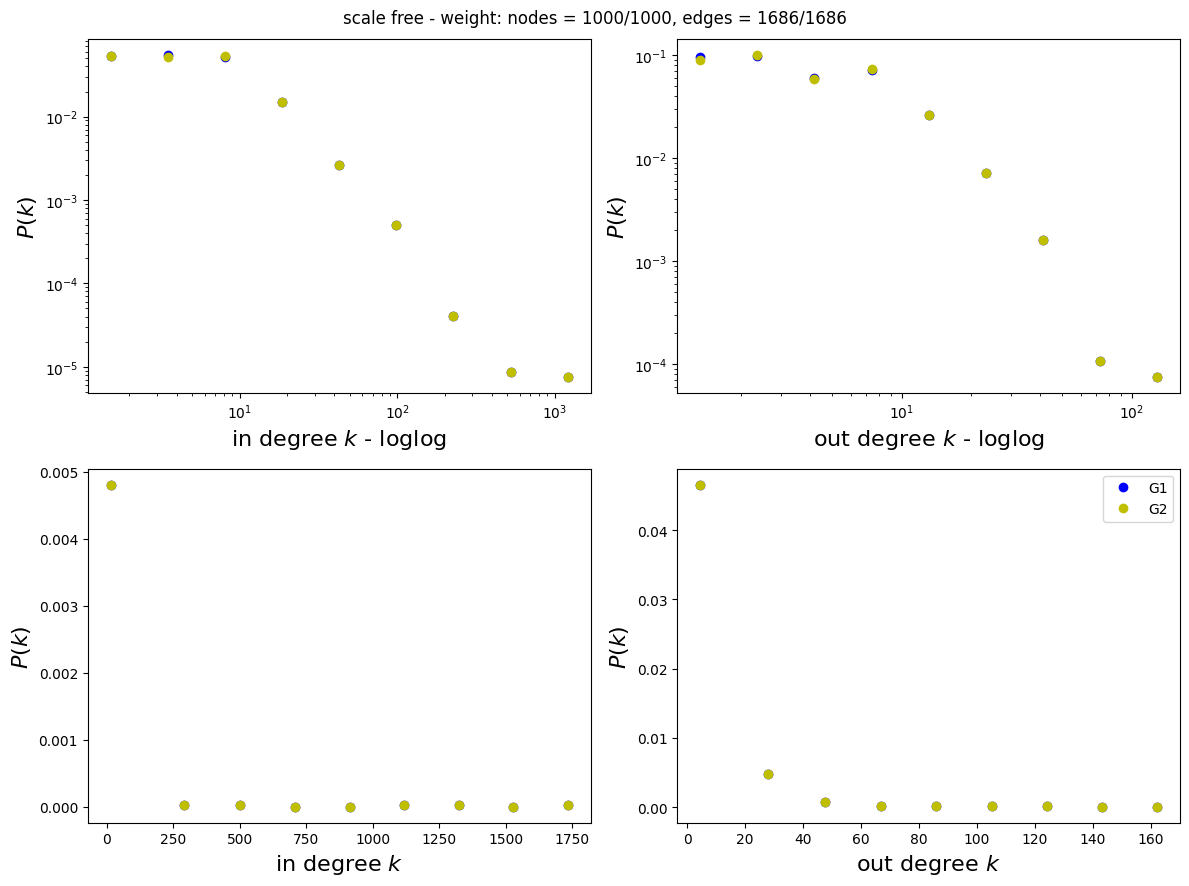

In [304]:
compare_func3(G, G_swap_annealing_new, 'scale free', weight='weight')

In [306]:
from scipy.stats import pearsonr

# for sorted weight sequence which really means nothing
x_in = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G.in_edges(data=True))])
y_in = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G_swap_annealing_new.in_edges(data=True))])

x_out = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G.edges(data=True))])
y_out = sorted([atts['weight'] if ('weight' in atts) else 0 for (u, v, atts) in list(G_swap_annealing_new.edges(data=True))])

print(pearsonr(x_in, y_in))
print(pearsonr(x_out, y_out))

PearsonRResult(statistic=1.0, pvalue=0.0)
PearsonRResult(statistic=1.0, pvalue=0.0)


In [307]:
from scipy.stats import pearsonr

# actual strength sequence
x_in = [s_in for (node, s_in) in sorted(list(G.in_degree(weight='weight')))]
y_in = [s_in for (node, s_in) in sorted(list(G_swap_annealing_new.in_degree(weight='weight')))]

x_out = [s_out for (node, s_out) in sorted(list(G.out_degree(weight='weight')))]
y_out = [s_out for (node, s_out) in sorted(list(G_swap_annealing_new.out_degree(weight='weight')))]
              
print(pearsonr(x_in, y_in))
print(pearsonr(x_out, y_out))

PearsonRResult(statistic=0.999994420900396, pvalue=0.0)
PearsonRResult(statistic=0.9996723474701604, pvalue=0.0)
